# Proyek Analisis Data: E-Commerce Public
- Nama: Ahlul Yoga Pratama
- Email:yuyowert@gmail.com
- Id Dicoding: Ahlul Yoga Pratama

## Menentukan Pertanyaan Bisnis

Pertanyaan 1: Seberapa signafikan kenaikan jumlah pesanan dalam perbulan ?
Pertanyaan 2: Produck apa yang paling laris terjual?
Pertanyaan 3: Metode Pembayaran Apa Yang Paling Banyak Digunakan ?
Pertanyaan 4: Kategori Produk Apa Yang Paling Banyak Menghasilkan Keuntungan ?
Pertanyaan 5: Berapa waktu yang diperlukan oleh e-commerce untuk menyelesaikan satu order pelanggan ?

## Menyaipkan semua library yang dibuthkan

In [2]:
import sys
print(sys.version)

3.11.6 (main, Oct  2 2023, 13:45:54) [Clang 15.0.0 (clang-1500.0.40.1)]


In [3]:
!pip3 install matplotlib
!pip3 install seaborn


[notice] A new release of pip is available: 23.2.1 -> 23.3.1
[notice] To update, run: python3.11 -m pip install --upgrade pip

[notice] A new release of pip is available: 23.2.1 -> 23.3.1
[notice] To update, run: python3.11 -m pip install --upgrade pip


In [4]:
import sklearn.metrics
print(dir(sklearn.metrics))

['ConfusionMatrixDisplay', 'DetCurveDisplay', 'DistanceMetric', 'PrecisionRecallDisplay', 'PredictionErrorDisplay', 'RocCurveDisplay', '__all__', '__builtins__', '__cached__', '__doc__', '__file__', '__loader__', '__name__', '__package__', '__path__', '__spec__', '_base', '_classification', '_dist_metrics', '_pairwise_distances_reduction', '_pairwise_fast', '_plot', '_ranking', '_regression', '_scorer', 'accuracy_score', 'adjusted_mutual_info_score', 'adjusted_rand_score', 'auc', 'average_precision_score', 'balanced_accuracy_score', 'brier_score_loss', 'calinski_harabasz_score', 'check_scoring', 'class_likelihood_ratios', 'classification_report', 'cluster', 'cohen_kappa_score', 'completeness_score', 'confusion_matrix', 'consensus_score', 'coverage_error', 'd2_absolute_error_score', 'd2_pinball_score', 'd2_tweedie_score', 'davies_bouldin_score', 'dcg_score', 'det_curve', 'euclidean_distances', 'explained_variance_score', 'f1_score', 'fbeta_score', 'fowlkes_mallows_score', 'get_scorer', 

In [5]:
# Import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# **Read Dataset**

In [6]:
df_customer = pd.read_csv('data/customers_dataset.csv')
df_geolocation = pd.read_csv('data/geolocation_dataset.csv')
df_orderItems = pd.read_csv('data/order_items_dataset.csv')
df_orderPay = pd.read_csv('data/order_payments_dataset.csv')
df_orderReview = pd.read_csv('data/order_reviews_dataset.csv')
df_orders = pd.read_csv('data/orders_dataset.csv')
df_products = pd.read_csv('data/products_dataset.csv')
df_seller = pd.read_csv('data/sellers_dataset.csv')
df_categoryName = pd.read_csv('data/product_category_name_translation.csv')

In [7]:
df_customer

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,sao paulo,SP
3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,8775,mogi das cruzes,SP
4,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,13056,campinas,SP
...,...,...,...,...,...
99436,17ddf5dd5d51696bb3d7c6291687be6f,1a29b476fee25c95fbafc67c5ac95cf8,3937,sao paulo,SP
99437,e7b71a9017aa05c9a7fd292d714858e8,d52a67c98be1cf6a5c84435bd38d095d,6764,taboao da serra,SP
99438,5e28dfe12db7fb50a4b2f691faecea5e,e9f50caf99f032f0bf3c55141f019d99,60115,fortaleza,CE
99439,56b18e2166679b8a959d72dd06da27f9,73c2643a0a458b49f58cea58833b192e,92120,canoas,RS


In [8]:
#Show all column

pd.set_option('display.max_columns', None)

### Assessing Data

- Missing value

In [9]:
# Menghitung jumlah nilai null di setiap DataFrame
null_counts_customer = df_customer.isnull().sum()
null_counts_geolocation = df_geolocation.isnull().sum()
null_counts_orderItems = df_orderItems.isnull().sum()
null_counts_orderPay = df_orderPay.isnull().sum()
null_counts_orderReview = df_orderReview.isnull().sum()
null_counts_orders = df_orders.isnull().sum()
null_counts_products = df_products.isnull().sum()
null_counts_seller = df_seller.isnull().sum()
null_counts_categoryName = df_categoryName.isnull().sum()

# Menampilkan hasil perhitungan
print("Jumlah nilai null dalam DataFrame df_customer:")
print(null_counts_customer)

print("Jumlah nilai null dalam DataFrame df_geolocation:")
print(null_counts_geolocation)

# Lakukan hal yang serupa untuk DataFrame lainnya
# ...

# Atau menyimpan hasil perhitungan dalam variabel untuk digunakan nanti


Jumlah nilai null dalam DataFrame df_customer:
customer_id                 0
customer_unique_id          0
customer_zip_code_prefix    0
customer_city               0
customer_state              0
dtype: int64
Jumlah nilai null dalam DataFrame df_geolocation:
geolocation_zip_code_prefix    0
geolocation_lat                0
geolocation_lng                0
geolocation_city               0
geolocation_state              0
dtype: int64


- Duplicate value

In [10]:
# Mengecek duplikat pada setiap DataFrame
duplicate_rows_customer = df_customer[df_customer.duplicated()]
duplicate_rows_geolocation = df_geolocation[df_geolocation.duplicated()]
duplicate_rows_orderItems = df_orderItems[df_orderItems.duplicated()]
# Lanjutkan untuk setiap DataFrame lainnya

# Menampilkan hasil perhitungan
print("Baris duplikat ditemukan dalam DataFrame:")
print(duplicate_rows_customer)
# Lanjutkan untuk setiap DataFrame lainnya


Baris duplikat ditemukan dalam DataFrame:
Empty DataFrame
Columns: [customer_id, customer_unique_id, customer_zip_code_prefix, customer_city, customer_state]
Index: []


- Outlier

In [11]:
# Contoh menggunakan IQR untuk mendeteksi pencilan pada kolom 'customer_zip_code_prefix' di setiap DataFrame

Q1_customer = df_customer['customer_zip_code_prefix'].quantile(0.25)
Q3_customer = df_customer['customer_zip_code_prefix'].quantile(0.75)
IQR_customer = Q3_customer - Q1_customer

outliers_customer = df_customer[(df_customer['customer_zip_code_prefix'] < Q1_customer - 1.5 * IQR_customer) | (df_customer['customer_zip_code_prefix'] > Q3_customer + 1.5 * IQR_customer)]
if not outliers_customer.empty:
    print("Pencilan ditemukan pada kolom 'customer_zip_code_prefix' dalam DataFrame df_customer:")
    print(outliers_customer)
# Lanjutkan untuk setiap DataFrame lainnya


# Merge Data

In [12]:
newData6 = df_customer.merge(right = df_orders, how = 'left', on = 'customer_id')
newData6 = newData6.merge(right = df_orderPay, on = 'order_id')
newData6 = newData6.merge(right = df_orderItems, on = 'order_id')
newData6 = newData6.merge(right = df_products, on = 'product_id')
newData6 = newData6.merge(right = df_orderReview, on = 'order_id')
newData6 = newData6.merge(right = df_categoryName, on = 'product_category_name')

In [13]:
newData6 = newData6.sort_values(by = 'order_item_id', ascending = False).drop_duplicates('order_id')

In [14]:
newData6.info()

<class 'pandas.core.frame.DataFrame'>
Index: 96516 entries, 69745 to 115608
Data columns (total 37 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   customer_id                    96516 non-null  object 
 1   customer_unique_id             96516 non-null  object 
 2   customer_zip_code_prefix       96516 non-null  int64  
 3   customer_city                  96516 non-null  object 
 4   customer_state                 96516 non-null  object 
 5   order_id                       96516 non-null  object 
 6   order_status                   96516 non-null  object 
 7   order_purchase_timestamp       96516 non-null  object 
 8   order_approved_at              96503 non-null  object 
 9   order_delivered_carrier_date   95557 non-null  object 
 10  order_delivered_customer_date  94486 non-null  object 
 11  order_estimated_delivery_date  96516 non-null  object 
 12  payment_sequential             96516 non-null 

In [15]:
newData6

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,order_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,payment_sequential,payment_type,payment_installments,payment_value,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm,review_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp,product_category_name_english
69745,fc3d1daec319d62d49bfb5e1f83123e9,4546caea018ad8c692964e3382debd19,5882,sao paulo,SP,8272b63d03f5f79c56e9e4120aec44ef,delivered,2017-07-16 18:19:25,2017-07-17 18:25:23,2017-07-20 15:45:53,2017-07-31 18:03:02,2017-07-28 00:00:00,1,credit_card,2,196.11,21,79ce45dbc2ea29b22b5a261bbb7b7ee7,2709af9587499e95e803a6498a5a56e9,2017-07-21 18:25:23,7.80,6.57,beleza_saude,27.0,152.0,2.0,1000.0,25.0,6.0,12.0,e8236fe7b6e1bdd513a500de361e2b87,1,NaN,Eu estou tentando cancelar faz tempo devido o ...,2017-07-30 00:00:00,2017-07-30 14:19:07,health_beauty
22732,be1b70680b9f9694d8c70f41fa3dc92b,c402f431464c72e27330a67f7b94d4fb,3029,sao paulo,SP,1b15974a0141d54e36626dca3fdc731a,delivered,2018-02-22 15:30:41,2018-02-24 03:20:27,2018-03-02 00:18:01,2018-03-05 15:22:27,2018-03-08 00:00:00,1,boleto,1,2202.40,20,ee3d532c8a438679776d222e997606b3,8e6d7754bc7e0f22c96d255ebda59eba,2018-03-01 02:50:48,100.00,10.12,informatica_acessorios,43.0,452.0,1.0,360.0,19.0,18.0,15.0,be332150a9c96e68c9565ea53cba2355,1,NaN,NaN,2018-03-06 00:00:00,2018-03-12 12:46:07,computers_accessories
39142,10de381f8a8d23fff822753305f71cae,0f5ac8d5c31de21d2f25e24be15bbffb,84600,uniao da vitoria,PR,428a2f660dc84138d969ccd69a0ab6d5,delivered,2017-11-23 20:30:52,2017-11-24 10:31:10,2017-11-28 16:42:21,2017-12-13 20:19:35,2017-12-19 00:00:00,1,credit_card,10,1225.65,15,89b190a046022486c635022524a974a8,f326006815956455b2859abd58fe7e39,2017-11-30 10:30:51,65.49,16.22,moveis_decoracao,59.0,1744.0,2.0,700.0,62.0,15.0,15.0,d638a70f2be180ef55395eabb78fd88c,5,NaN,NaN,2017-12-14 00:00:00,2017-12-19 14:14:16,furniture_decor
74213,adb32467ecc74b53576d9d13a5a55891,11f97da02237a49c8e783dfda6f50e8e,74885,goiania,GO,9ef13efd6949e4573a18964dd1bbe7f5,delivered,2017-01-30 21:44:49,2017-01-30 22:33:45,2017-02-01 14:34:10,2017-02-14 10:48:10,2017-03-07 00:00:00,1,credit_card,10,783.00,15,37eb69aca8718e843d897aa7b82f462d,0b36063d5818f81ccb94b54adfaebbf5,2017-02-03 21:44:49,51.00,1.20,ferramentas_jardim,43.0,369.0,2.0,600.0,38.0,16.0,25.0,2e3a6e4930334530774ac3a6f6b62388,5,NaN,NaN,2017-02-15 00:00:00,2017-02-16 17:14:41,garden_tools
60724,a7693fba2ff9583c78751f2b66ecab9d,f7ea4eef770a388bd5b225acfc546604,13330,indaiatuba,SP,9bdc4d4c71aa1de4606060929dee888c,delivered,2018-02-21 11:45:07,2018-02-22 11:48:42,2018-02-27 18:27:01,2018-03-01 20:47:01,2018-03-07 00:00:00,1,credit_card,6,528.78,14,44a5d24dd383324a421569ca697b13c2,e7d5b006eb624f13074497221eb37807,2018-02-28 11:48:12,29.99,7.78,telefonia,55.0,55.0,1.0,300.0,20.0,20.0,13.0,03129dea7c12fa5878b2e629ccdf2ce6,1,NaN,Comprei 14 unidades e recebi somente 9. Ainda ...,2018-03-02 00:00:00,2018-03-03 00:44:54,telephony
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
42101,3031c30daeda4aeb801d2967c7269bb4,bd4d35a669a4f67ab2f63ad6c96bf34f,15130,mirassol,SP,37efc102e49c3219c6ca92ce169327c9,delivered,2017-07-20 18:23:05,2017-07-20 18:35:15,2017-07-21 23:47:46,2017-07-31 20:35:41,2017-08-14 00:00:00,1,credit_card,1,57.80,1,06edb72f1e0c64b14c5b79353f7abea3,391fc6631aebcf3004804e51b40bcf1e,2017-07-31 18:35:15,45.95,11.85,cama_mesa_banho,39.0,161.0,2.0,350.0,25.0,8.0,19.0,06213e8cb89c63caf6fb813b01b6dee1,4,NaN,NaN,2017-08-01 00:00:00,2017-08-04 11:55:15,bed_bath_table
42100,bc829c278cd39a242d5e46

# **Data Cleaning**

**1. Deal with null value**

**Imputation**

In [16]:
newData6["review_comment_title"].fillna("No comment title", inplace = True);
newData6["review_comment_message"].fillna("No comment", inplace = True);
newData6.dropna(axis = 0, inplace = True)

In [17]:
newData6.info()

<class 'pandas.core.frame.DataFrame'>
Index: 94471 entries, 69745 to 115608
Data columns (total 37 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   customer_id                    94471 non-null  object 
 1   customer_unique_id             94471 non-null  object 
 2   customer_zip_code_prefix       94471 non-null  int64  
 3   customer_city                  94471 non-null  object 
 4   customer_state                 94471 non-null  object 
 5   order_id                       94471 non-null  object 
 6   order_status                   94471 non-null  object 
 7   order_purchase_timestamp       94471 non-null  object 
 8   order_approved_at              94471 non-null  object 
 9   order_delivered_carrier_date   94471 non-null  object 
 10  order_delivered_customer_date  94471 non-null  object 
 11  order_estimated_delivery_date  94471 non-null  object 
 12  payment_sequential             94471 non-null 

# **Data Preparation**

**1. Column Reduction**

In [18]:
newData6 = newData6.drop(['product_name_lenght', 'product_description_lenght', 'product_photos_qty', 'product_length_cm',
                          'product_height_cm', 'product_width_cm'], axis = 1)

**2. Change date format to datetime**

In [19]:
newData6['shipping_limit_date'] = pd.to_datetime(newData6['shipping_limit_date'])
newData6['review_creation_date'] = pd.to_datetime(newData6['review_creation_date'])
newData6['review_answer_timestamp'] = pd.to_datetime(newData6['review_answer_timestamp'])
newData6['order_purchase_timestamp'] = pd.to_datetime(newData6['order_purchase_timestamp'])
newData6['order_approved_at'] = pd.to_datetime(newData6['order_approved_at'])
newData6['order_delivered_carrier_date'] = pd.to_datetime(newData6['order_delivered_carrier_date'])
newData6['order_delivered_customer_date'] = pd.to_datetime(newData6['order_delivered_customer_date'])
newData6['order_estimated_delivery_date'] = pd.to_datetime(newData6['order_estimated_delivery_date'])
newData6['order_month'] = newData6['order_purchase_timestamp'].dt.to_period('M')
newData6['order_month']= newData6['order_month'].dt.strftime('%Y-%m')

**3. Separate month, year, day**

In [20]:
newData6['date'] = newData6['order_purchase_timestamp'].dt.day
newData6['month'] = newData6['order_purchase_timestamp'].dt.month
newData6['year'] = newData6['order_purchase_timestamp'].dt.year
newData6['day'] = newData6['order_purchase_timestamp'].dt.weekday

**4. Extract only date**

In [21]:
newData6['shipping_limit_date'] = pd.DataFrame(newData6['shipping_limit_date'].dt.date)
newData6['review_creation_date'] = pd.DataFrame(newData6['review_creation_date'].dt.date)
newData6['review_answer_timestamp'] = pd.DataFrame(newData6['review_answer_timestamp'].dt.date)
newData6['order_purchase_timestamp'] = pd.DataFrame(newData6['order_purchase_timestamp'].dt.date)
newData6['order_approved_at'] = pd.DataFrame(newData6['order_approved_at'].dt.date)
newData6['order_delivered_carrier_date'] = pd.DataFrame(newData6['order_delivered_carrier_date'].dt.date)
newData6['order_delivered_customer_date'] = pd.DataFrame(newData6['order_delivered_customer_date'].dt.date)
newData6['order_estimated_delivery_date'] = pd.DataFrame(newData6['order_estimated_delivery_date'].dt.date)

In [22]:
newData6

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,order_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,payment_sequential,payment_type,payment_installments,payment_value,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value,product_category_name,product_weight_g,review_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp,product_category_name_english,order_month,date,month,year,day
69745,fc3d1daec319d62d49bfb5e1f83123e9,4546caea018ad8c692964e3382debd19,5882,sao paulo,SP,8272b63d03f5f79c56e9e4120aec44ef,delivered,2017-07-16,2017-07-17,2017-07-20,2017-07-31,2017-07-28,1,credit_card,2,196.11,21,79ce45dbc2ea29b22b5a261bbb7b7ee7,2709af9587499e95e803a6498a5a56e9,2017-07-21,7.80,6.57,beleza_saude,1000.0,e8236fe7b6e1bdd513a500de361e2b87,1,No comment title,Eu estou tentando cancelar faz tempo devido o ...,2017-07-30,2017-07-30,health_beauty,2017-07,16,7,2017,6
22732,be1b70680b9f9694d8c70f41fa3dc92b,c402f431464c72e27330a67f7b94d4fb,3029,sao paulo,SP,1b15974a0141d54e36626dca3fdc731a,delivered,2018-02-22,2018-02-24,2018-03-02,2018-03-05,2018-03-08,1,boleto,1,2202.40,20,ee3d532c8a438679776d222e997606b3,8e6d7754bc7e0f22c96d255ebda59eba,2018-03-01,100.00,10.12,informatica_acessorios,360.0,be332150a9c96e68c9565ea53cba2355,1,No comment title,No comment,2018-03-06,2018-03-12,computers_accessories,2018-02,22,2,2018,3
39142,10de381f8a8d23fff822753305f71cae,0f5ac8d5c31de21d2f25e24be15bbffb,84600,uniao da vitoria,PR,428a2f660dc84138d969ccd69a0ab6d5,delivered,2017-11-23,2017-11-24,2017-11-28,2017-12-13,2017-12-19,1,credit_card,10,1225.65,15,89b190a046022486c635022524a974a8,f326006815956455b2859abd58fe7e39,2017-11-30,65.49,16.22,moveis_decoracao,700.0,d638a70f2be180ef55395eabb78fd88c,5,No comment title,No comment,2017-12-14,2017-12-19,furniture_decor,2017-11,23,11,2017,3
74213,adb32467ecc74b53576d9d13a5a55891,11f97da02237a49c8e783dfda6f50e8e,74885,goiania,GO,9ef13efd6949e4573a18964dd1bbe7f5,delivered,2017-01-30,2017-01-30,2017-02-01,2017-02-14,2017-03-07,1,credit_card,10,783.00,15,37eb69aca8718e843d897aa7b82f462d,0b36063d5818f81ccb94b54adfaebbf5,2017-02-03,51.00,1.20,ferramentas_jardim,600.0,2e3a6e4930334530774ac3a6f6b62388,5,No comment title,No comment,2017-02-15,2017-02-16,garden_tools,2017-01,30,1,2017,0
60724,a7693fba2ff9583c78751f2b66ecab9d,f7ea4eef770a388bd5b225acfc546604,13330,indaiatuba,SP,9bdc4d4c71aa1de4606060929dee888c,delivered,2018-02-21,2018-02-22,2018-02-27,2018-03-01,2018-03-07,1,credit_card,6,528.78,14,44a5d24dd383324a421569ca697b13c2,e7d5b006eb624f13074497221eb37807,2018-02-28,29.99,7.78,telefonia,300.0,03129dea7c12fa5878b2e629ccdf2ce6,1,No comment title,Comprei 14 unidades e recebi somente 9. Ainda ...,2018-03-02,2018-03-03,telephony,2018-02,21,2,2018,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
42101,3031c30daeda4aeb801d2967c7269bb4,bd4d35a669a4f67ab2f63ad6c96bf34f,15130,mirassol,SP,37efc102e49c3219c6ca92ce169327c9,delivered,2017-07-20,2017-07-20,2017-07-21,2017-07-31,2017-08-14,1,credit_card,1,57.80,1,06edb72f1e0c64b14c5b79353f7abea3,391fc6631aebcf3004804e51b40bcf1e,2017-07-31,45.95,11.85,cama_mesa_banho,350.0,06213e8cb89c63caf6fb813b01b6dee1,4,No comment title,No comment,2017-08-01,2017-08-04,bed_bath_table,2017-07,20,7,2017,3
42100,bc829c278cd39a242d5e4622c143be36,21e6ec6ccd68df56494e410d876122bc,46900,seabra,BA,0e069a67e95068b8613f728bac35f6cc,delivered,2018-02-10,2018-02-10,2018-02-16,2018-03-01,2018-03-13,1,credit_card,1,56.78,1,06edb72f1e0c64b14c5b79353f7abea3,391fc6631aebcf3004804e51b40bcf1e,2018-02-20,39.99,16.79,cama_mesa_banho,350.0,3665d4e66a83131e21b4dbff1e0f782d,5,No comment title,No comment,2018-03-02,2018-03-02,bed_bath_table,2018-02,10,2,2018,5
42099,e6557efa505b53ac452221d438e7829d,fceeca5395427e515376a7

# Exploratory Data Analysis

In [23]:
# Menampilkan info DataFrame, seperti ukuran DataFrame dan tipe data kolom
print(newData6.info())

# Statistik deskriptif
print(newData6.describe())


<class 'pandas.core.frame.DataFrame'>
Index: 94471 entries, 69745 to 115608
Data columns (total 36 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   customer_id                    94471 non-null  object 
 1   customer_unique_id             94471 non-null  object 
 2   customer_zip_code_prefix       94471 non-null  int64  
 3   customer_city                  94471 non-null  object 
 4   customer_state                 94471 non-null  object 
 5   order_id                       94471 non-null  object 
 6   order_status                   94471 non-null  object 
 7   order_purchase_timestamp       94471 non-null  object 
 8   order_approved_at              94471 non-null  object 
 9   order_delivered_carrier_date   94471 non-null  object 
 10  order_delivered_customer_date  94471 non-null  object 
 11  order_estimated_delivery_date  94471 non-null  object 
 12  payment_sequential             94471 non-null 

In [24]:
newData6.groupby(['review_score'])['product_category_name_english'].describe()

,count,unique,top,freq
review_score,,,,
1,9176,69,bed_bath_table,1075
2,2873,62,bed_bath_table,362
3,7820,68,bed_bath_table,897
4,18616,70,bed_bath_table,1832
5,55986,70,health_beauty,5368


Dari Tabel diatas tidak hubungan antara review sama categori. karena di review score 1-4 itu didominasi sama bed_bath_table, dan di review score 5 itu didominasi sama health_beauty

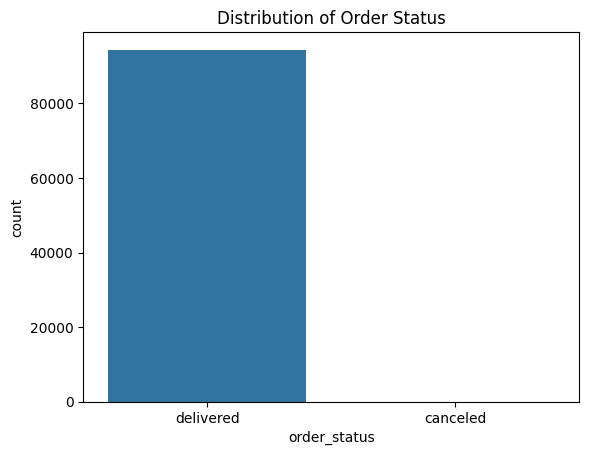

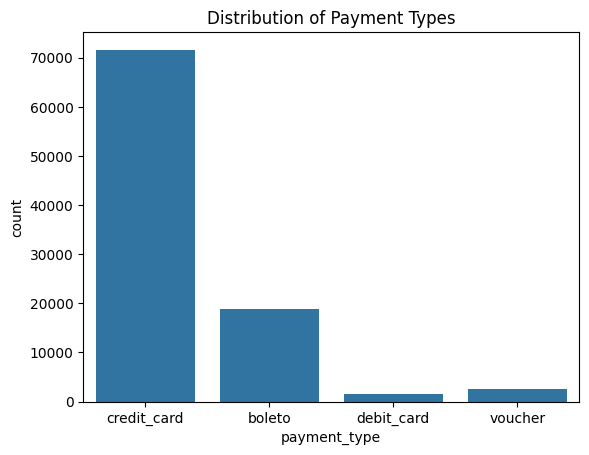

In [25]:
# Distribusi order_status
sns.countplot(x='order_status', data=newData6)
plt.title('Distribution of Order Status')
plt.show()

# Distribusi payment_type
sns.countplot(x='payment_type', data=newData6)
plt.title('Distribution of Payment Types')
plt.show()

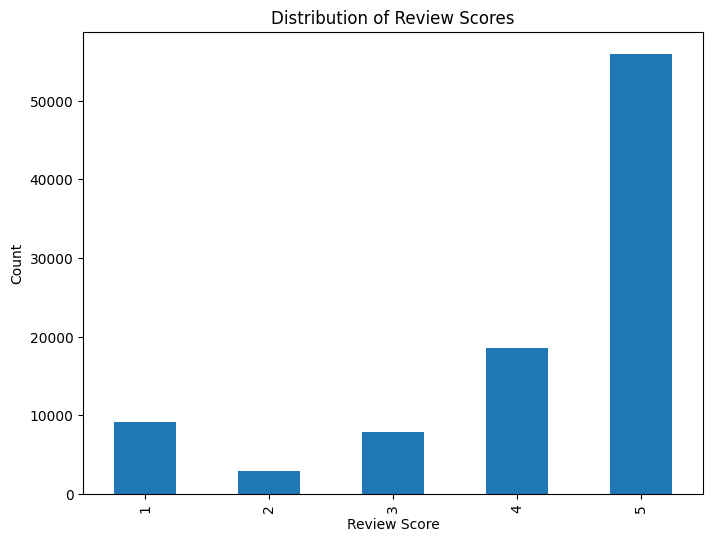

In [26]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6))
newData6['review_score'].value_counts().sort_index().plot(kind='bar')
plt.xlabel('Review Score')
plt.ylabel('Count')
plt.title('Distribution of Review Scores')
plt.show()


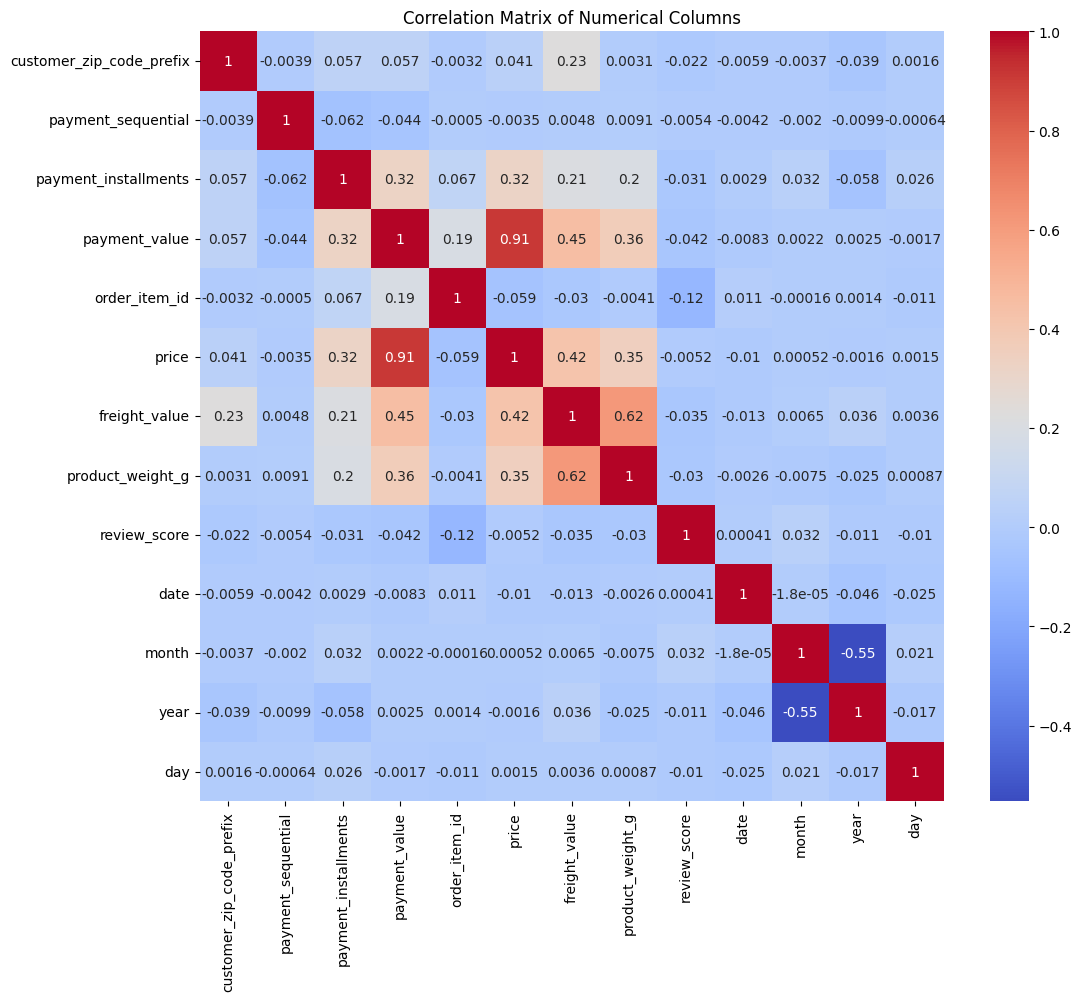

In [27]:
# Melakukan filtering hanya untuk kolom dengan tipe data numerik
numeric_columns = ['customer_zip_code_prefix', 'payment_sequential', 'payment_installments', 'payment_value', 'order_item_id', 'price', 'freight_value', 'product_weight_g', 'review_score', 'date', 'month', 'year', 'day']

# Membuat DataFrame baru hanya dengan kolom numerik
numeric_data = newData6[numeric_columns]

# Menghitung matriks korelasi
correlation_matrix = numeric_data.corr()

# Matriks Korelasi
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix of Numerical Columns')
plt.show()

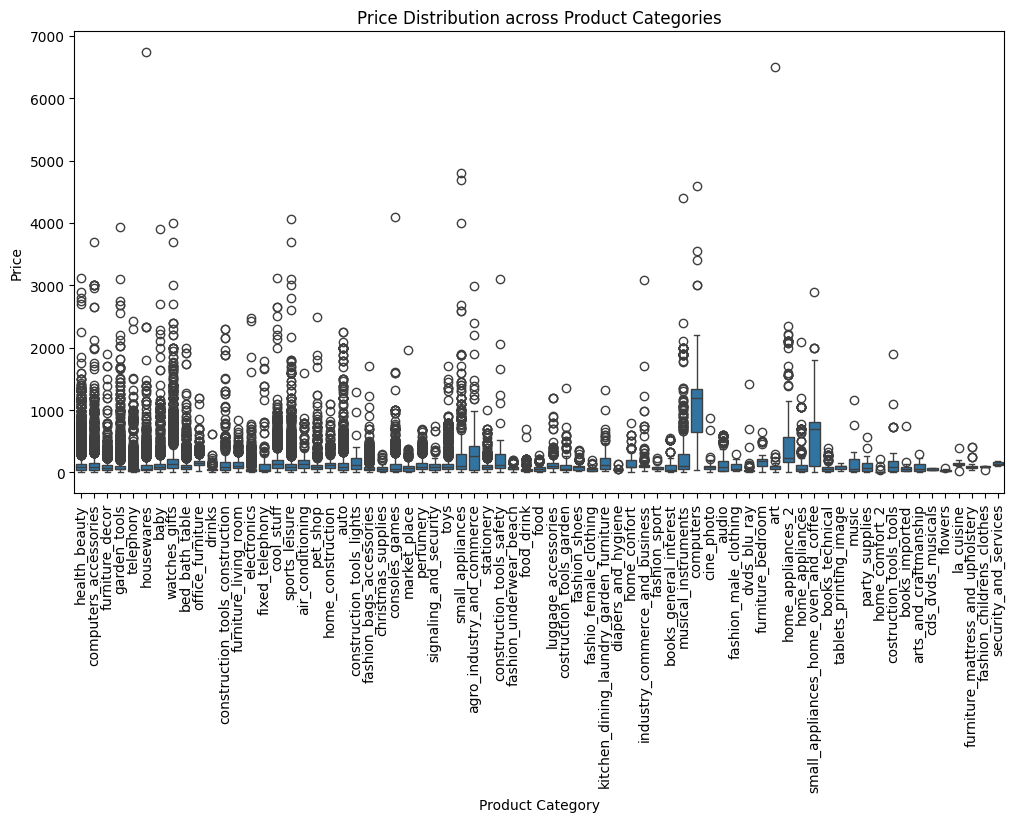

In [28]:
plt.figure(figsize=(12, 6))
sns.boxplot(x='product_category_name_english', y='price', data=newData6)
plt.xticks(rotation=90)
plt.xlabel('Product Category')
plt.ylabel('Price')
plt.title('Price Distribution across Product Categories')
plt.show()

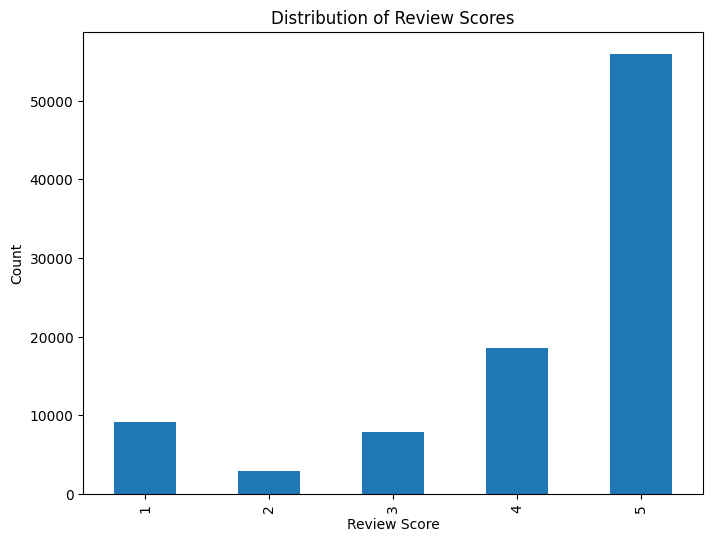

In [29]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6))
newData6['review_score'].value_counts().sort_index().plot(kind='bar')
plt.xlabel('Review Score')
plt.ylabel('Count')
plt.title('Distribution of Review Scores')
plt.show()

## Visualization & Explanatory Analysis

### Pertanyaan 1: Seberapa signafikan kenaikan jumlah pesanan dalam perbulan ?

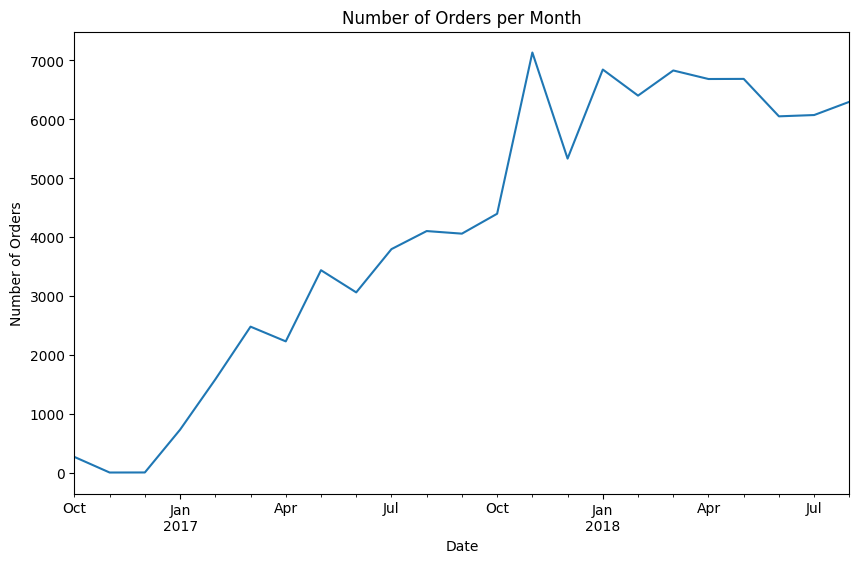

In [30]:
# Menggunakan order_purchase_timestamp atau variabel waktu lainnya
newData6['order_purchase_timestamp'] = pd.to_datetime(newData6['order_purchase_timestamp'])

# Membuat plot jumlah pesanan per bulan
plt.figure(figsize=(10, 6))
newData6.resample('M', on='order_purchase_timestamp').order_id.count().plot()
plt.xlabel('Date')
plt.ylabel('Number of Orders')
plt.title('Number of Orders per Month')
plt.show()


### Pertanyaan 2: Produck apa yang paling laris terjual?

In [31]:
# Menghitung jumlah penjualan tiap produk (berdasarkan product_id)
product_sales = newData6['product_category_name_english'].value_counts()

# Menampilkan produk yang paling laku (produk dengan penjualan terbanyak)
most_sold_product = product_sales.idxmax()  # ID produk yang paling laku
sales_count = product_sales.max()  # Jumlah penjualan produk paling laku

print(f"Product terlaris: {most_sold_product} dengan total penjualan: {sales_count}")


Product terlaris: bed_bath_table dengan total penjualan: 9085


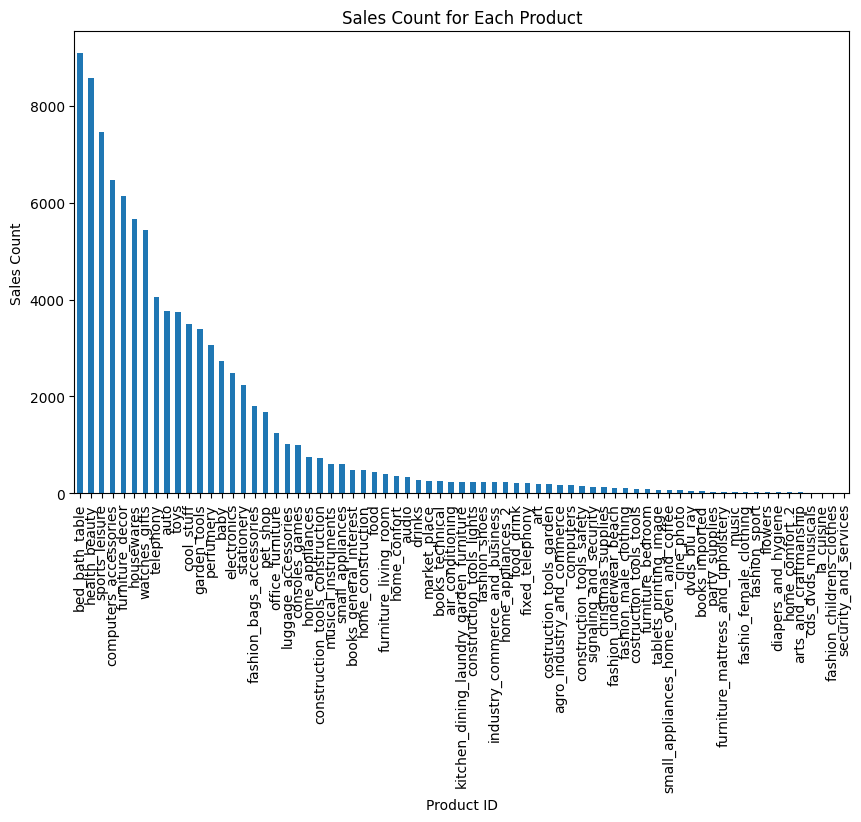

In [32]:
plt.figure(figsize=(10, 6))
product_sales.plot(kind='bar')
plt.xlabel('Product ID')
plt.ylabel('Sales Count')
plt.title('Sales Count for Each Product')
plt.show()

### Pertanyaan 3: Metode Pembayaran Apa Yang Paling Banyak Digunakan ?

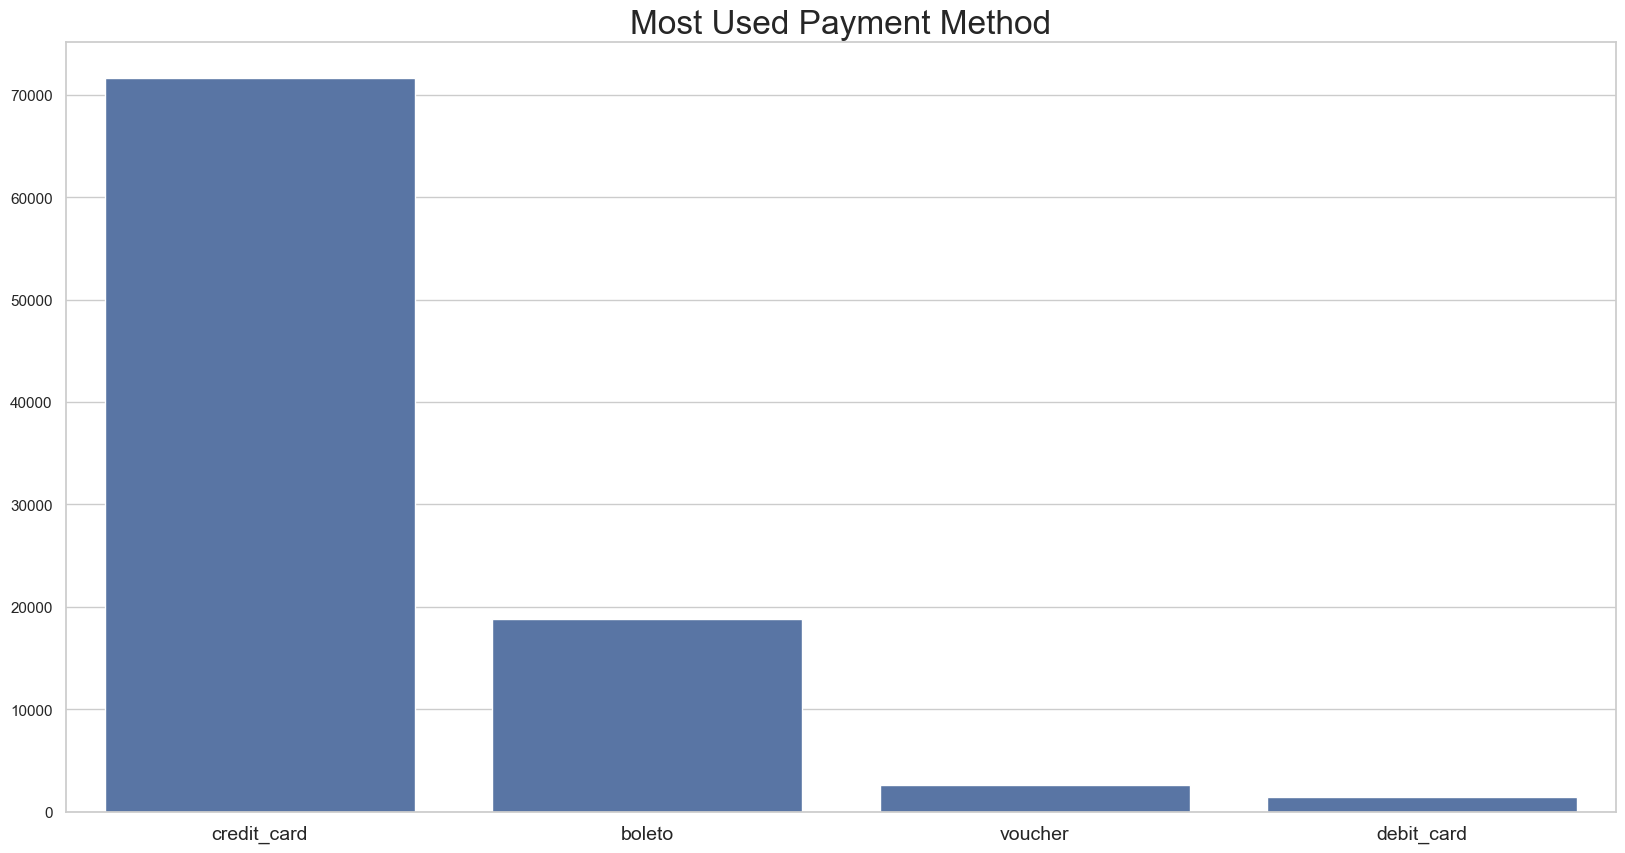

In [33]:

most_used_payment_method_df = newData6.groupby(by = "payment_type")["order_id"].nunique().reset_index()
most_used_payment_method_df.rename(columns = {
    "order_id": "count"
}, inplace = True)

sns.set(style='whitegrid', rc={"figure.figsize":(20,10)})
sns.barplot(
    x = "payment_type",
    y = "count",
    data = most_used_payment_method_df.sort_values(by = "count", ascending = False),
)
plt.title("Most Used Payment Method", loc="center", fontsize=24)
plt.ylabel(None)
plt.xlabel(None)
plt.tick_params(axis='x', labelsize=14)
plt.show()

### Pertanyaan 4: Kategori Produk Apa Yang Paling Banyak Menghasilkan Keuntungan ?

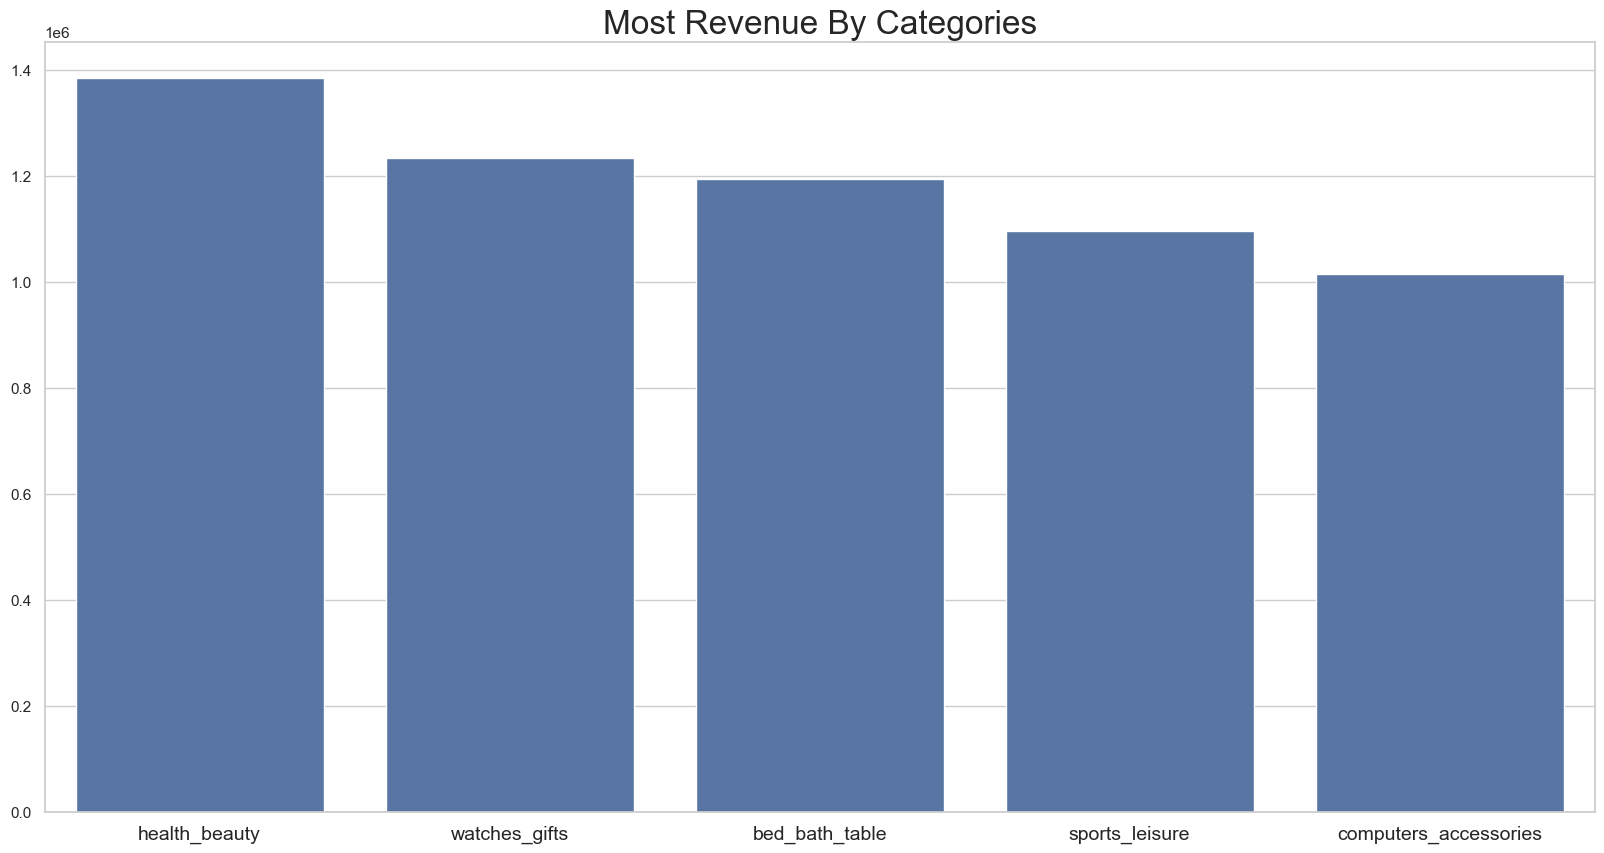

In [34]:
most_revenue_categories_df = newData6.groupby(by = "product_category_name_english", as_index = False).agg({
    "order_id": "nunique",
    "payment_value": "sum",
})
most_revenue_categories_df.rename(columns = {
    "order_id": "order_count",
    "payment_value": "total_revenue"
}, inplace = True)

sns.set(style='whitegrid', rc={"figure.figsize":(20,10)})
sns.barplot(
    x = "product_category_name_english",
    y = "total_revenue",
    data = most_revenue_categories_df.nlargest(5, "total_revenue"),
)
plt.title("Most Revenue By Categories", loc="center", fontsize=24)
plt.ylabel(None)
plt.xlabel(None)
plt.tick_params(axis='x', labelsize=14)
plt.show()

### Pertanyaan 5 : Berapa waktu yang diperlukan oleh e-commerce untuk menyelesaikan satu order pelanggan ?

In [35]:
# Pastikan kolom-kolom yang dibutuhkan telah diubah ke tipe data datetime
newData6['order_delivered_customer_date'] = pd.to_datetime(newData6['order_delivered_customer_date'])
newData6['order_purchase_timestamp'] = pd.to_datetime(newData6['order_purchase_timestamp'])

# Hitung waktu untuk satu order dan tambahkan ke DataFrame
newData6['waktu_untuk_satu_order'] = (newData6['order_delivered_customer_date'] - newData6['order_purchase_timestamp']).dt.total_seconds() / 3600

# Tampilkan statistik deskriptif
print(newData6['waktu_untuk_satu_order'].describe())


count    94471.000000
mean       298.845233
std        227.139256
min          0.000000
25%        168.000000
50%        240.000000
75%        384.000000
max       4992.000000
Name: waktu_untuk_satu_order, dtype: float64


In [36]:
print (298.845233 / 24, 0 / 24, 4992 / 24)

12.451884708333333 0.0 208.0


In [37]:
newData6

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,order_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,payment_sequential,payment_type,payment_installments,payment_value,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value,product_category_name,product_weight_g,review_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp,product_category_name_english,order_month,date,month,year,day,waktu_untuk_satu_order
69745,fc3d1daec319d62d49bfb5e1f83123e9,4546caea018ad8c692964e3382debd19,5882,sao paulo,SP,8272b63d03f5f79c56e9e4120aec44ef,delivered,2017-07-16,2017-07-17,2017-07-20,2017-07-31,2017-07-28,1,credit_card,2,196.11,21,79ce45dbc2ea29b22b5a261bbb7b7ee7,2709af9587499e95e803a6498a5a56e9,2017-07-21,7.80,6.57,beleza_saude,1000.0,e8236fe7b6e1bdd513a500de361e2b87,1,No comment title,Eu estou tentando cancelar faz tempo devido o ...,2017-07-30,2017-07-30,health_beauty,2017-07,16,7,2017,6,360.0
22732,be1b70680b9f9694d8c70f41fa3dc92b,c402f431464c72e27330a67f7b94d4fb,3029,sao paulo,SP,1b15974a0141d54e36626dca3fdc731a,delivered,2018-02-22,2018-02-24,2018-03-02,2018-03-05,2018-03-08,1,boleto,1,2202.40,20,ee3d532c8a438679776d222e997606b3,8e6d7754bc7e0f22c96d255ebda59eba,2018-03-01,100.00,10.12,informatica_acessorios,360.0,be332150a9c96e68c9565ea53cba2355,1,No comment title,No comment,2018-03-06,2018-03-12,computers_accessories,2018-02,22,2,2018,3,264.0
39142,10de381f8a8d23fff822753305f71cae,0f5ac8d5c31de21d2f25e24be15bbffb,84600,uniao da vitoria,PR,428a2f660dc84138d969ccd69a0ab6d5,delivered,2017-11-23,2017-11-24,2017-11-28,2017-12-13,2017-12-19,1,credit_card,10,1225.65,15,89b190a046022486c635022524a974a8,f326006815956455b2859abd58fe7e39,2017-11-30,65.49,16.22,moveis_decoracao,700.0,d638a70f2be180ef55395eabb78fd88c,5,No comment title,No comment,2017-12-14,2017-12-19,furniture_decor,2017-11,23,11,2017,3,480.0
74213,adb32467ecc74b53576d9d13a5a55891,11f97da02237a49c8e783dfda6f50e8e,74885,goiania,GO,9ef13efd6949e4573a18964dd1bbe7f5,delivered,2017-01-30,2017-01-30,2017-02-01,2017-02-14,2017-03-07,1,credit_card,10,783.00,15,37eb69aca8718e843d897aa7b82f462d,0b36063d5818f81ccb94b54adfaebbf5,2017-02-03,51.00,1.20,ferramentas_jardim,600.0,2e3a6e4930334530774ac3a6f6b62388,5,No comment title,No comment,2017-02-15,2017-02-16,garden_tools,2017-01,30,1,2017,0,360.0
60724,a7693fba2ff9583c78751f2b66ecab9d,f7ea4eef770a388bd5b225acfc546604,13330,indaiatuba,SP,9bdc4d4c71aa1de4606060929dee888c,delivered,2018-02-21,2018-02-22,2018-02-27,2018-03-01,2018-03-07,1,credit_card,6,528.78,14,44a5d24dd383324a421569ca697b13c2,e7d5b006eb624f13074497221eb37807,2018-02-28,29.99,7.78,telefonia,300.0,03129dea7c12fa5878b2e629ccdf2ce6,1,No comment title,Comprei 14 unidades e recebi somente 9. Ainda ...,2018-03-02,2018-03-03,telephony,2018-02,21,2,2018,2,192.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
42101,3031c30daeda4aeb801d2967c7269bb4,bd4d35a669a4f67ab2f63ad6c96bf34f,15130,mirassol,SP,37efc102e49c3219c6ca92ce169327c9,delivered,2017-07-20,2017-07-20,2017-07-21,2017-07-31,2017-08-14,1,credit_card,1,57.80,1,06edb72f1e0c64b14c5b79353f7abea3,391fc6631aebcf3004804e51b40bcf1e,2017-07-31,45.95,11.85,cama_mesa_banho,350.0,06213e8cb89c63caf6fb813b01b6dee1,4,No comment title,No comment,2017-08-01,2017-08-04,bed_bath_table,2017-07,20,7,2017,3,264.0
42100,bc829c278cd39a242d5e4622c143be36,21e6ec6ccd68df56494e410d876122bc,46900,seabra,BA,0e069a67e95068b8613f728bac35f6cc,delivered,2018-02-10,2018-02-10,2018-02-16,2018-03-01,2018-03-13,1,credit_card,1,56.78,1,06edb72f1e0c64b14c5b79353f7abea3,391fc6631aebcf3004804e51b40bcf1e,2018-02-20,39.99,16.79,cama_mesa_banho,350.0,3665d4e66a83131e21b4dbff1e0f782d,5,No comment title,No comment,2018-03-02,2018-03-02,bed_bath_table,2018-02,10,2,2018,

## Conclusion

- Conclution pertanyaan 1 :
pada Oct 2016 jumlah pesanan dibawah 1000 naik ke 4500 di Oct 2017, lalu naik lagi ke 7000an di Des 2017, sempat turun juga ke 5500 di awal januari 2018, dan stabil di 6000an hingga juli 2018.

- conclution pertanyaan 2 : Product terlaris adalah Bed_bath_table (kasur, Bak mandi, Meja) terjual 9085 produk disusul Health Beauty (Kecantikan).

- conclution pertanyaan 3 : Berdasarkan visualisasi di bawah. Metode pembayaran yang paling banyak digunakan adalah Kartu kredit disusul oleh boleto, voucher dan kartu debit.


- conclution pertanyaan 4 : Berdasarkan visualisasi di bawah. Kategori produk yang paling banyak menghasilkan keuntungan ialah kategori bed_bath_table (semacam kasur/meja/benda di kamar mandi). Lalu, disusul oleh peralatan kecantikan, aksesoris komputer, dekorasi furnitur dan hadiah berupa jam tangan.

  Hasil ini sedikit berbeda dengan pertanyaan ke-2 dimana peralatan olahraga merupakan salah satu kategori produk yang paling banyak terjual tetapi tidak terlalu menguntungkan dan juga hadiah jam tangan merupakan salah satu kategori yang menguntungkan walaupun dari segi pembelian cukup sedikit yang membelinya dibandingkan dengan kategori yang lain.

- conclution pertanyaan 5 : Rata-rata waktu untuk menyelesaikan satu pesanan adalah 298.8452329286236 jam, dan kalo dihitung dalam 1 hari 12.451884708333333 jam.

In [38]:
newData6.to_csv("all_data.csv", index=False)